   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone
0         0       3    1  22.0      1      0   7.2500           2        0
1         1       1    0  38.0      1      0  71.2833           2        0
2         1       3    0  26.0      0      0   7.9250           1        1
3         1       1    0  35.0      1      0  53.1000           2        0
4         0       3    1  35.0      0      0   8.0500           1        1
Train shape: (712, 8)
Test shape: (179, 8)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 - 1s - 33ms/step - accuracy: 0.4143 - loss: 0.7337 - val_accuracy: 0.4190 - val_loss: 0.7156
Epoch 2/50
23/23 - 0s - 4ms/step - accuracy: 0.5028 - loss: 0.7031 - val_accuracy: 0.5140 - val_loss: 0.6896
Epoch 3/50
23/23 - 0s - 4ms/step - accuracy: 0.5829 - loss: 0.6830 - val_accuracy: 0.6704 - val_loss: 0.6679
Epoch 4/50
23/23 - 0s - 4ms/step - accuracy: 0.6517 - loss: 0.6566 - val_accuracy: 0.7095 - val_loss: 0.6463
Epoch 5/50
23/23 - 0s - 4ms/step - accuracy: 0.7247 - loss: 0.6281 - val_accuracy: 0.7430 - val_loss: 0.6274
Epoch 6/50
23/23 - 0s - 4ms/step - accuracy: 0.7402 - loss: 0.6157 - val_accuracy: 0.7430 - val_loss: 0.6119
Epoch 7/50
23/23 - 0s - 4ms/step - accuracy: 0.7612 - loss: 0.6030 - val_accuracy: 0.7765 - val_loss: 0.5967
Epoch 8/50
23/23 - 0s - 4ms/step - accuracy: 0.7612 - loss: 0.5944 - val_accuracy: 0.7877 - val_loss: 0.5841
Epoch 9/50
23/23 - 0s - 4ms/step - accuracy: 0.7697 - loss: 0.5784 - val_accuracy: 0.8045 - val_loss: 0.5730
Epoch 10/50
23/23 

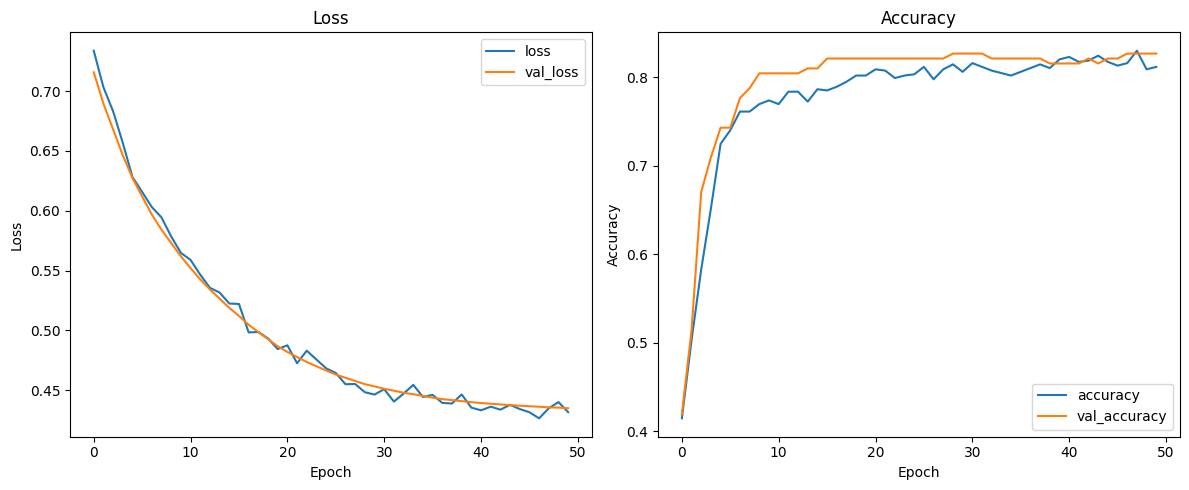

Accuracy:  0.8268156424581006
Precision:  0.8392857142857143
Recall:  0.6811594202898551
F1-Score:  0.752


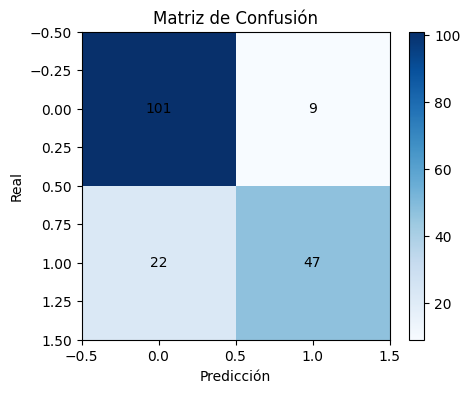

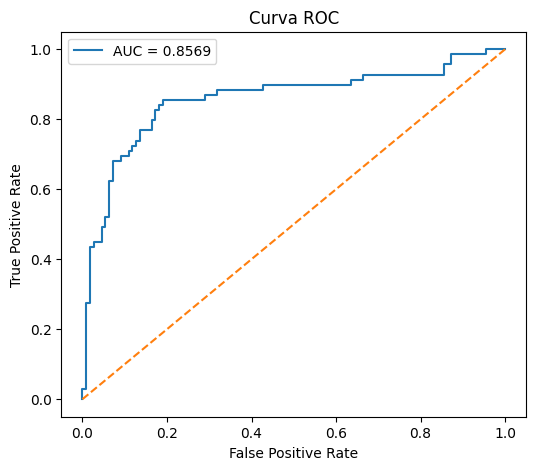

Modelo: 'rna_titanic.h5' guardado con éxito!


In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib

ruta_train = r"..\data\dataset_train.csv"
df = pd.read_csv(ruta_train)
print(df.head())

X = df.drop("Survived", axis=1).values.astype("float32")
y = df["Survived"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    Dense(128, activation="relu"),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.summary()

model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50,
    verbose=2,
    validation_data=(X_test, y_test),
)

y_pred_proba = model.predict(X_test)          
y_pred = (y_pred_proba > 0.5).astype(int)    

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(12,5))
# ---- LOSS ----
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
# ---- ACCURACY ----
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

print("Accuracy: ",acc)
print("Precision: ",prec)
print("Recall: ",rec)
print("F1-Score: ",f1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xlabel("Predicción")
plt.ylabel("Real")

for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.title("Curva ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


model.save("rna_titanic.h5")
joblib.dump(scaler, "rna_scaler.pkl")
print("Modelo: 'rna_titanic.h5' guardado con éxito!")
